In [1]:
from kan import *
from pprint import pprint

In [2]:
TEST_N = 8

In [3]:
f = lambda x: torch.exp(torch.sin(torch.sin(x[:,[0]] + 2 * x[:, [0]]**2) - 0.5 * x[:, [0]]))
dataset = create_dataset(f, n_var=1)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [4]:
models = []

train loss: 8.65e-04 | test loss: 8.74e-04 | reg: 1.63e+01 : 100%|█| 100/100 [00:14<00:00,  7.11it/s
train loss: 2.90e-04 | test loss: 2.96e-04 | reg: 2.00e+01 : 100%|█| 100/100 [00:26<00:00,  3.80it/s
train loss: 1.61e-04 | test loss: 1.66e-04 | reg: 1.89e+01 : 100%|█| 100/100 [00:31<00:00,  3.16it/s
train loss: 1.17e-04 | test loss: 1.11e-04 | reg: 2.14e+01 : 100%|█| 100/100 [00:36<00:00,  2.78it/s
train loss: 6.00e-05 | test loss: 5.88e-05 | reg: 2.54e+01 : 100%|█| 100/100 [00:41<00:00,  2.43it/s
train loss: 9.37e-05 | test loss: 9.34e-05 | reg: 2.89e+01 : 100%|█| 100/100 [00:47<00:00,  2.09it/s
train loss: 9.75e-05 | test loss: 9.22e-05 | reg: 2.86e+01 : 100%|█| 100/100 [00:54<00:00,  1.85it/s


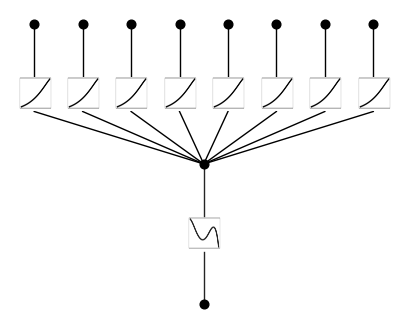

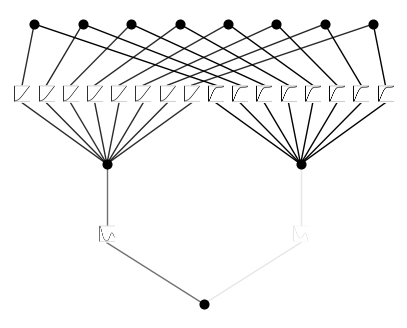

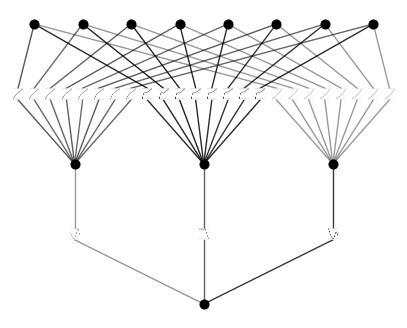

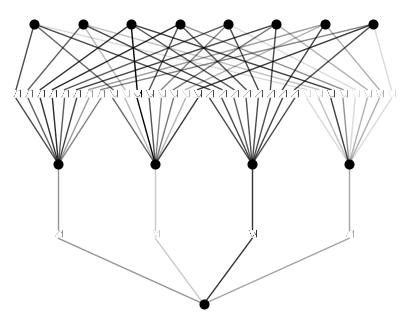

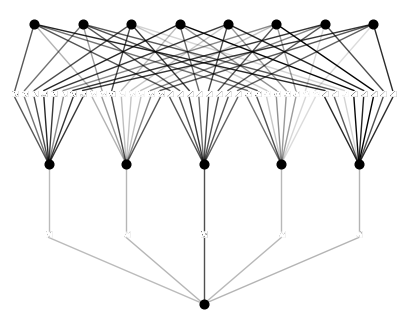

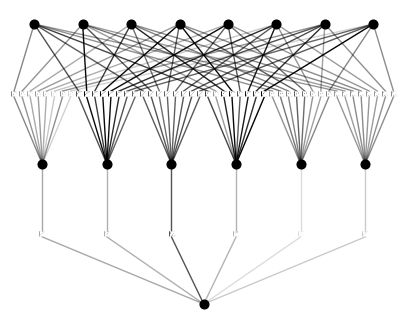

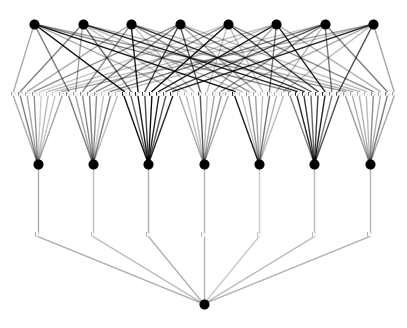

In [5]:
for n in range(1, TEST_N) :
    model = KAN(width=[1,n,8], grid=5, k=3)
    model.train(dataset, opt="LBFGS", steps=100)
    model.prune()
    model.plot(mask=True)

    models.append(model)

In [6]:
for n, model in enumerate(models) :
    for i in range(0, n + 2) :
        for j in range(0, n + 2) :
            for k in range(0, 8) :
                print(n, i, j, k)
                try :
                    model.fix_symbolic(i,j,k,'sin');
                except :
                    break

0 0 0 0
r2 is 0.8093650937080383
r2 is not very high, please double check if you are choosing the correct symbolic function.
0 0 0 1
0 0 1 0
0 1 0 0
r2 is 0.9998675584793091
0 1 0 1
r2 is 0.9998629093170166
0 1 0 2
r2 is 0.9998626112937927
0 1 0 3
r2 is 0.9998620748519897
0 1 0 4
r2 is 0.9998632073402405
0 1 0 5
r2 is 0.9998663663864136
0 1 0 6
r2 is 0.9998602867126465
0 1 0 7
r2 is 0.9998568296432495
0 1 1 0
1 0 0 0
r2 is 0.8253124356269836
r2 is not very high, please double check if you are choosing the correct symbolic function.
1 0 0 1
r2 is 0.6778371930122375
r2 is not very high, please double check if you are choosing the correct symbolic function.
1 0 0 2
1 0 1 0
1 0 2 0
1 1 0 0
r2 is 0.9999499320983887
1 1 0 1
r2 is 0.9999467730522156
1 1 0 2
r2 is 0.9999487400054932
1 1 0 3
r2 is 0.9999498724937439
1 1 0 4
r2 is 0.9999468326568604
1 1 0 5
r2 is 0.9999488592147827
1 1 0 6
r2 is 0.9999486207962036
1 1 0 7
r2 is 0.99994957447052
1 1 1 0
r2 is 0.9827250838279724
1 1 1 1
r2 is 0.98

In [7]:
for model in models :
    pprint(model.symbolic_formula()[0])

[4.12 - 3.41*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.01 - 3.3*sin(0.28*sin(4.5*x_1 - 3.99) - 5.33),
 4.07 - 3.36*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.08 - 3.37*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.12 - 3.41*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.12 - 3.41*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.13 - 3.42*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32),
 4.08 - 3.37*sin(0.28*sin(4.5*x_1 - 3.99) - 5.32)]
[-0.74*sin(0.78*sin(3.94*x_1 + 5.19) + 2.21) - 28.57*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 26.41,
 -0.74*sin(0.78*sin(3.94*x_1 + 5.19) + 2.21) - 28.6*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 26.44,
 -0.74*sin(0.79*sin(3.94*x_1 + 5.19) + 2.22) - 27.72*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 25.56,
 -0.74*sin(0.78*sin(3.94*x_1 + 5.19) + 2.21) - 28.92*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 26.75,
 -0.74*sin(0.78*sin(3.94*x_1 + 5.19) + 2.21) - 28.56*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 26.4,
 -0.75*sin(0.78*sin(3.94*x_1 + 5.19) + 2.21) - 28.86*sin(0.09*sin(4.81*x_1 + 8.81) - 1.45) - 26

n= 1 model


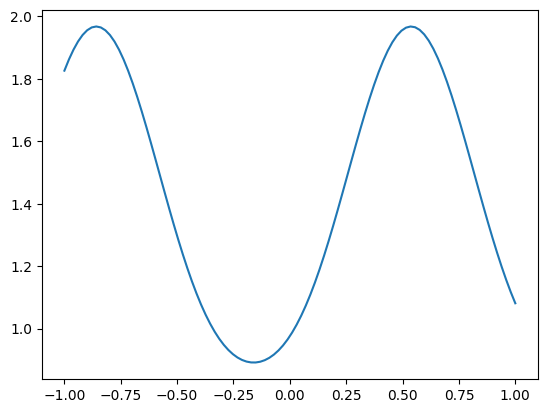

n= 2 model


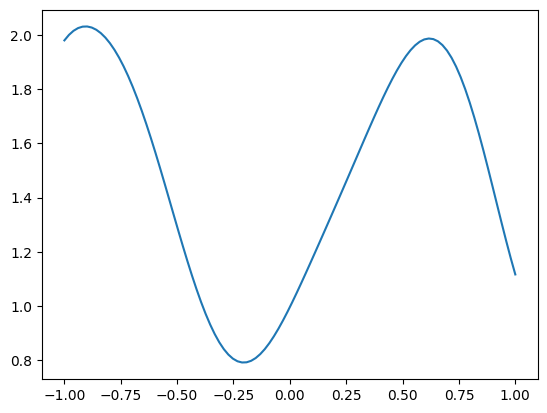

n= 3 model


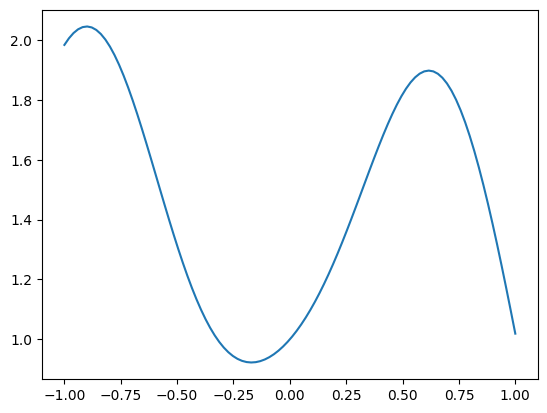

n= 4 model


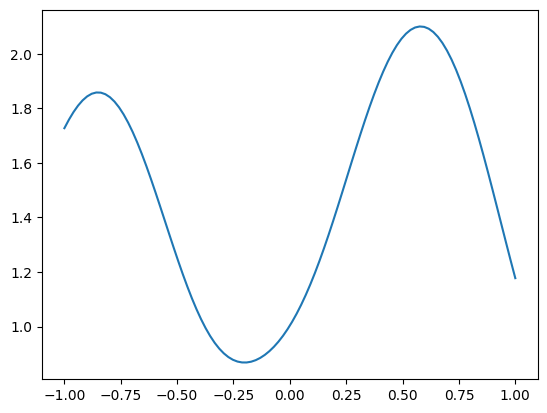

n= 5 model


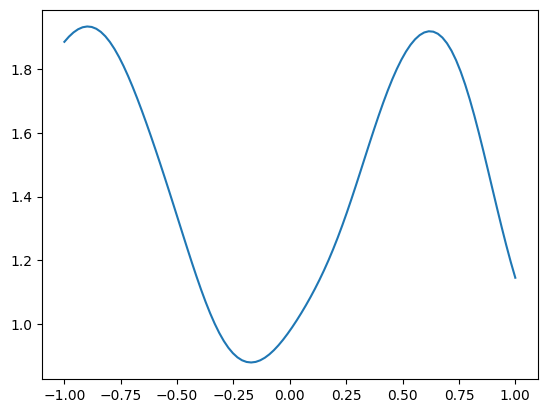

n= 6 model


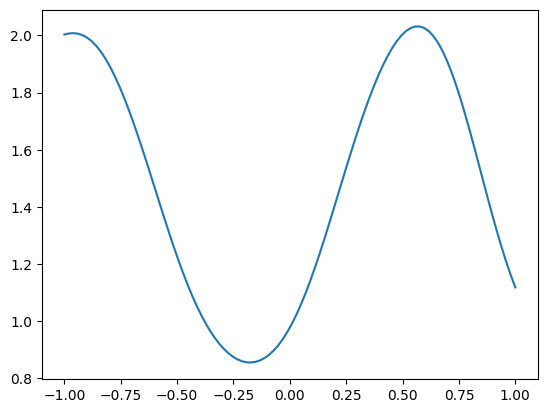

n= 7 model


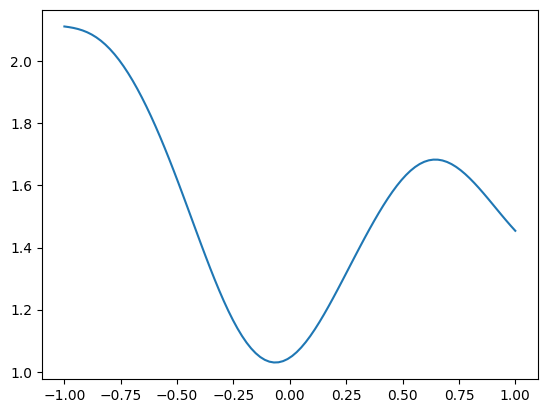

In [8]:
import numpy as np  
import matplotlib.pyplot as plt  
from numpy import sin, cos

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y)  
    plt.show()  
    
for n, model in enumerate(models) :
    def model_formula(x_1):
        return eval(str(model.symbolic_formula()[0][0]))
    print('n=', n + 1, 'model')
    graph(model_formula, np.linspace(-1,1,100))

Dataset


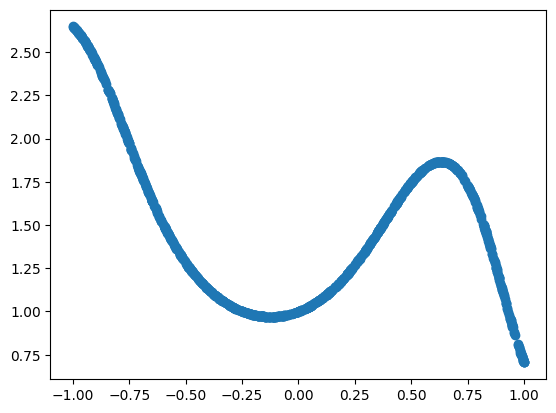

In [9]:
print('Dataset')
plt.scatter(dataset['train_input'], dataset['train_label'])
plt.show()  